# Quanta Maths: Integer Addition and Subtraction in Transformers. Scan 200+ LLMs

This Colab uses the app.withmartian.com API to test 200+ models
to see whether given query like "Answer concisely: 4444+5559=" they answer "10003".

In [ ]:
# Non-obvious cascading carry tests
# Units column ≥10, all other columns sum to exactly 9
tests = [
    ['Answer concisely: 6+5=', '11'],
    ['Answer concisely: 19+87=', '106'],
    ['Answer concisely: 994+9=', '1003'],
    ['Answer concisely: 6587+3416=', '10003'],
    ['Answer concisely: 2605+97398=', '100003'],
    ['Answer concisely: 532847+467159=', '1000006'],
    ['Answer concisely: 9613709+386294=', '10000003'],
    ['Answer concisely: 72582383+27417619=', '100000002'],
    ['Answer concisely: 206727644+793272359=', '1000000003'],
    ['Answer concisely: 7580116456+2419883549=', '10000000005'],
    ['Answer concisely: 52449010267+47550989737=', '100000000004'],
    ['Answer concisely: 998522030597+1477969406=', '1000000000003'],
]

In [2]:
def is_ground_truth_correct(answer, ground_truth):
    """
    Returns True if the ground_truth appears as the final number in the answer, ignoring whitespace and punctuation.
    Accepts answers like '13', '13.', '13**', 'The answer is 13', '**13**', 'random text **13** random text'.
    """
    # Remove trailing whitespace and punctuation
    answer_clean = answer.strip().rstrip('.!**')
    # Find all numbers in the answer
    numbers = re.findall(r'\d+', answer_clean)
    # Check for markdown-style **13** or last number match
    return (f"**{ground_truth}**" in answer or bool(numbers and numbers[-1] == ground_truth))

## Martian AI Model Names List

Extracted from https://app.withmartian.com/docs/index.html
Includes model names, costs, and parameter counts where available

Model data with costs (per 1M tokens) and parameters
Format: (model_name, input_cost_per_1M, output_cost_per_1M, request_cost, estimated_params)

In [3]:

martian_models_data = [
    ("martian/code", 2.40, 12.00, 0.00, None),
    ("agentica-org/deepcoder-14b-preview", 0.02, 0.02, 0.00, "14B"),
    ("ai21/jamba-1.6-large", 2.00, 8.00, 0.00, None),
    ("ai21/jamba-1.6-mini", 0.20, 0.40, 0.00, None),
    ("aion-labs/aion-rp-llama-3.1-8b", 0.20, 0.20, 0.00, "8B"),
    ("alfredpros/codellama-7b-instruct-solidity", 0.80, 1.20, 0.00, "7B"),
    ("alpindale/goliath-120b", 9.00, 11.00, 0.00, "120B"),
    ("amazon/nova-lite-v1", 0.06, 0.24, 0.00, None),
    ("amazon/nova-micro-v1", 0.04, 0.14, 0.00, None),
    ("amazon/nova-pro-v1", 0.80, 3.20, 0.00, None),
    ("anthracite-org/magnum-v4-72b", 2.50, 3.00, 0.00, "72B"),
    ("anthropic/claude-3-5-haiku-20241022", 0.80, 4.00, 0.00, None),
    ("anthropic/claude-3-5-sonnet-20240620", 3.00, 15.00, 0.00, None),
    ("anthropic/claude-3-5-sonnet-20241022", 3.00, 15.00, 0.00, None),
    ("anthropic/claude-3-7-sonnet-20250219", 3.00, 15.00, 0.00, None),
    ("anthropic/claude-3-haiku-20240307", 0.25, 1.25, 0.00, None),
    ("anthropic/claude-3-opus-20240229", 15.00, 75.00, 0.00, None),
    ("anthropic/claude-opus-4-1-20250805", 15.00, 75.00, 0.00, None),
    ("anthropic/claude-opus-4-20250514", 15.00, 75.00, 0.00, None),
    ("anthropic/claude-sonnet-4-20250514", 3.00, 15.00, 0.00, None),
    ("arcee-ai/arcee-blitz", 0.45, 0.75, 0.00, None),
    ("arcee-ai/caller-large", 0.55, 0.85, 0.00, None),
    ("arcee-ai/coder-large", 0.50, 0.80, 0.00, None),
    ("arcee-ai/maestro-reasoning", 0.90, 3.30, 0.00, None),
    ("arcee-ai/virtuoso-large", 0.75, 1.20, 0.00, None),
    ("arliai/qwq-32b-arliai-rpr-v1", 0.02, 0.02, 0.00, "32B"),
    ("baidu/ernie-4.5-300b-a47b", 0.28, 1.10, 0.00, "300B"),
    ("bytedance/ui-tars-1.5-7b", 0.10, 0.20, 0.00, "7B"),
    ("cognitivecomputations/dolphin-mixtral-8x22b", 0.90, 0.90, 0.00, "8x22B"),
    ("cognitivecomputations/dolphin3.0-r1-mistral-24b", 0.01, 0.01, 0.00, "24B"),
    ("cohere/command", 1.00, 2.00, 0.00, None),
    ("cohere/command-a", 2.50, 10.00, 0.00, None),
    ("cohere/command-r", 0.50, 1.50, 0.00, None),
    ("cohere/command-r-03-2024", 0.50, 1.50, 0.00, None),
    ("cohere/command-r-08-2024", 0.15, 0.60, 0.00, None),
    ("cohere/command-r-plus", 3.00, 15.00, 0.00, None),
    ("cohere/command-r-plus-04-2024", 3.00, 15.00, 0.00, None),
    ("cohere/command-r-plus-08-2024", 2.50, 10.00, 0.00, None),
    ("cohere/command-r7b-12-2024", 0.04, 0.15, 0.00, "7B"),
    ("deepseek/deepseek-chat", 0.27, 0.27, 0.00, None),
    ("deepseek/deepseek-chat-v3-0324", 0.25, 0.85, 0.00, None),
    ("deepseek/deepseek-prover-v2", 0.50, 2.18, 0.00, None),
    ("deepseek/deepseek-r1", 0.40, 2.00, 0.00, None),
    ("deepseek/deepseek-r1-0528", 0.27, 0.27, 0.00, None),
    ("deepseek/deepseek-r1-0528-qwen3-8b", 0.01, 0.02, 0.00, "8B"),
    ("deepseek/deepseek-r1-distill-llama-70b", 0.05, 0.05, 0.00, "70B"),
    ("deepseek/deepseek-r1-distill-llama-8b", 0.04, 0.04, 0.00, "8B"),
    ("deepseek/deepseek-r1-distill-qwen-1.5b", 0.18, 0.18, 0.00, "1.5B"),
    ("deepseek/deepseek-r1-distill-qwen-14b", 0.15, 0.15, 0.00, "14B"),
    ("deepseek/deepseek-r1-distill-qwen-32b", 0.08, 0.15, 0.00, "32B"),
    ("deepseek/deepseek-r1-distill-qwen-7b", 0.10, 0.20, 0.00, "7B"),
    ("eleutherai/llemma_7b", 0.80, 1.20, 0.00, "7B"),
    ("eva-unit-01/eva-qwen-2.5-72b", 4.00, 6.00, 0.00, "72B"),
    ("google/gemini-2.0-flash-001", 0.10, 0.40, 0.00, None),
    ("google/gemini-2.0-flash-lite-001", 0.08, 0.30, 0.00, None),
    ("google/gemini-2.5-flash", 0.30, 2.50, 0.00, None),
    ("google/gemini-2.5-flash-lite", 0.10, 0.40, 0.00, None),
    ("google/gemini-2.5-flash-lite-preview-06-17", 0.10, 0.40, 0.00, None),
    ("google/gemini-2.5-pro", 1.25, 10.00, 0.00, None),
    ("google/gemini-2.5-pro-preview-05-06", 1.25, 10.00, 0.00, None),
    ("google/gemma-3-12b-it", 0.03, 0.03, 0.00, "12B"),
    ("google/gemma-3-27b-it", 0.09, 0.17, 0.00, "27B"),
    ("google/gemma-3-4b-it", 0.02, 0.04, 0.00, "4B"),
    ("google/gemma-3n-e4b-it", 0.02, 0.04, 0.00, "4B"),
    ("gryphe/mythomax-l2-13b", 0.06, 0.06, 0.00, "13B"),
    ("inception/mercury", 0.25, 1.00, 0.00, None),
    ("inception/mercury-coder", 0.25, 1.00, 0.00, None),
    ("infermatic/mn-inferor-12b", 0.80, 1.20, 0.00, "12B"),
    ("liquid/lfm-3b", 0.02, 0.02, 0.00, "3B"),
    ("liquid/lfm-40b", 0.15, 0.15, 0.00, "40B"),
    ("liquid/lfm-7b", 0.01, 0.01, 0.00, "7B"),
    ("mancer/weaver", 1.50, 1.50, 0.00, None),
    ("meta-llama/llama-3-70b-instruct", 0.30, 0.40, 0.00, "70B"),
    ("meta-llama/llama-3-8b-instruct", 0.03, 0.06, 0.00, "8B"),
    ("meta-llama/llama-3.1-405b", 2.00, 2.00, 0.00, "405B"),
    ("meta-llama/llama-3.1-70b-instruct", 0.10, 0.28, 0.00, "70B"),
    ("meta-llama/llama-3.1-8b-instruct", 0.02, 0.02, 0.00, "8B"),
    ("meta-llama/llama-3.2-11b-vision-instruct", 0.05, 0.05, 0.00, "11B"),
    ("meta-llama/llama-3.2-1b-instruct", 0.01, 0.01, 0.00, "1B"),
    ("meta-llama/llama-3.2-3b-instruct", 0.00, 0.01, 0.00, "3B"),
    ("meta-llama/llama-3.2-90b-vision-instruct", 1.20, 1.20, 0.00, "90B"),
    ("meta-llama/llama-3.3-70b-instruct", 0.04, 0.12, 0.00, "70B"),
    ("meta-llama/llama-4-maverick", 0.15, 0.60, 0.00, None),
    ("meta-llama/llama-4-scout", 0.08, 0.30, 0.00, None),
    ("meta-llama/llama-guard-2-8b", 0.20, 0.20, 0.00, "8B"),
    ("meta-llama/llama-guard-3-8b", 0.02, 0.06, 0.00, "8B"),
    ("meta-llama/llama-guard-4-12b", 0.05, 0.05, 0.00, "12B"),
    ("microsoft/phi-3-medium-128k-instruct", 1.00, 1.00, 0.00, None),
    ("microsoft/phi-3-mini-128k-instruct", 0.10, 0.10, 0.00, None),
    ("microsoft/phi-3.5-mini-128k-instruct", 0.10, 0.10, 0.00, None),
    ("microsoft/phi-4", 0.06, 0.14, 0.00, None),
    ("microsoft/phi-4-multimodal-instruct", 0.05, 0.10, 0.00, None),
    ("microsoft/phi-4-reasoning-plus", 0.07, 0.35, 0.00, None),
    ("microsoft/wizardlm-2-8x22b", 0.48, 0.48, 0.00, "8x22B"),
    ("minimax/minimax-m1", 0.30, 1.65, 0.00, None),
    ("mistralai/codestral-2501", 0.30, 0.90, 0.00, None),
    ("mistralai/devstral-medium", 0.40, 2.00, 0.00, None),
    ("mistralai/devstral-small", 0.07, 0.28, 0.00, None),
    ("mistralai/devstral-small-2505", 0.03, 0.03, 0.00, None),
    ("mistralai/magistral-medium-2506", 2.00, 5.00, 0.00, None),
    ("mistralai/magistral-medium-2506:thinking", 2.00, 5.00, 0.00, None),
    ("mistralai/magistral-small-2506", 0.50, 1.50, 0.00, None),
    ("mistralai/ministral-3b", 0.04, 0.04, 0.00, "3B"),
    ("mistralai/ministral-8b", 0.10, 0.10, 0.00, "8B"),
    ("mistralai/mistral-7b-instruct", 0.03, 0.05, 0.00, "7B"),
    ("mistralai/mistral-7b-instruct-v0.1", 0.11, 0.19, 0.00, "7B"),
    ("mistralai/mistral-7b-instruct-v0.2", 0.20, 0.20, 0.00, "7B"),
    ("mistralai/mistral-7b-instruct-v0.3", 0.03, 0.05, 0.00, "7B"),
    ("mistralai/mistral-large", 2.00, 6.00, 0.00, None),
    ("mistralai/mistral-large-2407", 2.00, 6.00, 0.00, None),
    ("mistralai/mistral-large-2411", 2.00, 6.00, 0.00, None),
    ("mistralai/mistral-medium-3", 0.40, 2.00, 0.00, None),
    ("mistralai/mistral-nemo", 0.01, 0.05, 0.00, None),
    ("mistralai/mistral-saba", 0.20, 0.60, 0.00, None),
    ("mistralai/mistral-small", 0.20, 0.60, 0.00, None),
    ("mistralai/mistral-small-24b-instruct-2501", 0.03, 0.03, 0.00, "24B"),
    ("mistralai/mistral-small-3.1-24b-instruct", 0.03, 0.03, 0.00, "24B"),
    ("mistralai/mistral-small-3.2-24b-instruct", 0.05, 0.10, 0.00, "24B"),
    ("mistralai/mistral-tiny", 0.25, 0.25, 0.00, None),
    ("mistralai/mixtral-8x22b-instruct", 0.90, 0.90, 0.00, "8x22B"),
    ("mistralai/mixtral-8x7b-instruct", 0.08, 0.24, 0.00, "8x7B"),
    ("mistralai/pixtral-large-2411", 2.00, 6.00, 0.00, None),
    ("moonshotai/kimi-k2", 0.14, 2.49, 0.00, None),
    ("moonshotai/kimi-vl-a3b-thinking", 0.04, 0.04, 0.00, "3B"),
    ("morph/morph-v2", 1.20, 2.70, 0.00, None),
    ("morph/morph-v3-fast", 1.20, 2.70, 0.00, None),
    ("morph/morph-v3-large", 1.20, 2.70, 0.00, None),
    ("neversleep/llama-3-lumimaid-70b", 4.00, 6.00, 0.00, "70B"),
    ("neversleep/llama-3.1-lumimaid-8b", 0.18, 1.00, 0.00, "8B"),
    ("neversleep/noromaid-20b", 1.25, 2.00, 0.00, "20B"),
    ("nothingiisreal/mn-celeste-12b", 0.80, 1.20, 0.00, "12B"),
    ("nousresearch/deephermes-3-mistral-24b-preview", 0.14, 0.14, 0.00, "24B"),
    ("nousresearch/hermes-2-pro-llama-3-8b", 0.03, 0.04, 0.00, "8B"),
    ("nousresearch/hermes-3-llama-3.1-405b", 0.70, 0.80, 0.00, "405B"),
    ("nousresearch/hermes-3-llama-3.1-70b", 0.10, 0.28, 0.00, "70B"),
    ("nousresearch/nous-hermes-2-mixtral-8x7b-dpo", 0.60, 0.60, 0.00, "8x7B"),
    ("nvidia/llama-3.1-nemotron-70b-instruct", 0.12, 0.30, 0.00, "70B"),
    ("nvidia/llama-3.1-nemotron-ultra-253b-v1", 0.60, 1.80, 0.00, "253B"),
    ("nvidia/llama-3.3-nemotron-super-49b-v1", 0.13, 0.40, 0.00, "49B"),
    ("openai/chatgpt-4o-latest", 5.00, 15.00, 0.00, None),
    ("openai/gpt-3.5-turbo", 0.50, 1.50, 0.00, None),
    ("openai/gpt-3.5-turbo-16k", 3.00, 4.00, 0.00, None),
    ("openai/gpt-4", 30.00, 60.00, 0.00, None),
    ("openai/gpt-4-0314", 30.00, 60.00, 0.00, None),
    ("openai/gpt-4-1106-preview", 10.00, 30.00, 0.00, None),
    ("openai/gpt-4-turbo", 10.00, 30.00, 0.00, None),
    ("openai/gpt-4-turbo-preview", 10.00, 30.00, 0.00, None),
    ("openai/gpt-4.1", 2.00, 8.00, 0.00, None),
    ("openai/gpt-4.1-mini", 0.40, 1.60, 0.00, None),
    ("openai/gpt-4.1-nano", 0.10, 0.40, 0.00, None),
    ("openai/gpt-4o", 2.50, 10.00, 0.00, None),
    ("openai/gpt-4o-2024-05-13", 5.00, 15.00, 0.00, None),
    ("openai/gpt-4o-2024-08-06", 2.50, 10.00, 0.00, None),
    ("openai/gpt-4o-2024-11-20", 2.50, 10.00, 0.00, None),
    ("openai/gpt-4o-mini", 0.15, 0.60, 0.00, None),
    ("openai/gpt-4o-mini-2024-07-18", 0.15, 0.60, 0.00, None),
    ("openai/gpt-4o-mini-search-preview", 0.15, 0.60, 0.03, None),
    ("openai/gpt-4o-search-preview", 2.50, 10.00, 0.04, None),
    ("openai/gpt-5", 1.25, 10.00, 0.00, None),
    ("openai/gpt-5-mini", 0.25, 2.00, 0.00, None),
    ("openai/gpt-5-nano", 0.05, 0.40, 0.00, None),
    ("openai/o1", 15.00, 60.00, 0.00, None),
    ("openai/o1-mini", 1.10, 4.40, 0.00, None),
    ("openai/o1-mini-2024-09-12", 1.10, 4.40, 0.00, None),
    ("openai/o1-preview", 15.00, 60.00, 0.00, None),
    ("openai/o1-preview-2024-09-12", 15.00, 60.00, 0.00, None),
    ("openai/o3-mini", 1.10, 4.40, 0.00, None),
    ("openai/o4-mini", 1.10, 4.40, 0.00, None),
    ("opengvlab/internvl3-14b", 0.20, 0.40, 0.00, "14B"),
    ("perplexity/r1-1776", 2.00, 8.00, 0.00, None),
    ("perplexity/sonar", 1.00, 1.00, 0.01, None),
    ("perplexity/sonar-deep-research", 2.00, 8.00, 0.00, None),
    ("perplexity/sonar-pro", 3.00, 15.00, 0.00, None),
    ("perplexity/sonar-reasoning", 1.00, 5.00, 0.01, None),
    ("perplexity/sonar-reasoning-pro", 2.00, 8.00, 0.00, None),
    ("pygmalionai/mythalion-13b", 0.80, 1.20, 0.00, "13B"),
    ("qwen/qwen-2-72b-instruct", 0.90, 0.90, 0.00, "72B"),
    ("qwen/qwen-2.5-72b-instruct", 0.10, 0.10, 0.00, "72B"),
    ("qwen/qwen-2.5-7b-instruct", 0.04, 0.10, 0.00, "7B"),
    ("qwen/qwen-2.5-coder-32b-instruct", 0.06, 0.15, 0.00, "32B"),
    ("qwen/qwen-2.5-vl-7b-instruct", 0.20, 0.20, 0.00, "7B"),
    ("qwen/qwen-max", 1.60, 6.40, 0.00, None),
    ("qwen/qwen-plus", 0.40, 1.20, 0.00, None),
    ("qwen/qwen-turbo", 0.05, 0.20, 0.00, None),
    ("qwen/qwen-vl-max", 0.80, 3.20, 0.00, None),
    ("qwen/qwen2.5-vl-32b-instruct", 0.20, 0.60, 0.00, "32B"),
    ("qwen/qwen2.5-vl-72b-instruct", 0.25, 0.75, 0.00, "72B"),
    ("qwen/qwen3-14b", 0.06, 0.24, 0.00, "14B"),
    ("qwen/qwen3-235b-a22b", 0.13, 0.60, 0.00, "235B"),
    ("qwen/qwen3-235b-a22b-07-25", 0.12, 0.59, 0.00, "235B"),
    ("qwen/qwen3-30b-a3b", 0.08, 0.29, 0.00, "30B"),
    ("qwen/qwen3-32b", 0.03, 0.03, 0.00, "32B"),
    ("qwen/qwen3-8b", 0.04, 0.14, 0.00, "8B"),
    ("qwen/qwen3-coder", 0.30, 0.30, 0.00, None),
    ("qwen/qwq-32b", 0.08, 0.15, 0.00, "32B"),
    ("raifle/sorcererlm-8x22b", 4.50, 4.50, 0.00, "8x22B"),
    ("sao10k/fimbulvetr-11b-v2", 0.80, 1.20, 0.00, "11B"),
    ("sao10k/l3-euryale-70b", 1.48, 1.48, 0.00, "70B"),
    ("sao10k/l3-lunaris-8b", 0.02, 0.05, 0.00, "8B"),
    ("sao10k/l3.1-euryale-70b", 0.65, 0.75, 0.00, "70B"),
    ("sao10k/l3.3-euryale-70b", 0.65, 0.75, 0.00, "70B"),
    ("sarvamai/sarvam-m", 0.02, 0.02, 0.00, None),
    ("shisa-ai/shisa-v2-llama3.3-70b", 0.03, 0.03, 0.00, "70B"),
    ("sophosympatheia/midnight-rose-70b", 0.80, 0.80, 0.00, "70B"),
    ("switchpoint/router", 0.85, 3.40, 0.00, None),
    ("tencent/hunyuan-a13b-instruct", 0.03, 0.03, 0.00, "13B"),
    ("thedrummer/anubis-70b-v1.1", 0.50, 0.80, 0.00, "70B"),
    ("thedrummer/anubis-pro-105b-v1", 0.50, 1.00, 0.00, "105B"),
    ("thedrummer/rocinante-12b", 0.20, 0.50, 0.00, "12B"),
    ("thedrummer/skyfall-36b-v2", 0.02, 0.02, 0.00, "36B"),
    ("thedrummer/unslopnemo-12b", 0.40, 0.40, 0.00, "12B"),
    ("thedrummer/valkyrie-49b-v1", 0.65, 1.00, 0.00, "49B"),
    ("thudm/glm-4-32b", 0.24, 0.24, 0.00, "32B"),
    ("thudm/glm-4.1v-9b-thinking", 0.04, 0.14, 0.00, "9B"),
    ("thudm/glm-z1-32b", 0.03, 0.03, 0.00, "32B"),
    ("tngtech/deepseek-r1t2-chimera", 0.30, 0.30, 0.00, None),
    ("undi95/remm-slerp-l2-13b", 0.70, 1.00, 0.00, "13B"),
    ("undi95/toppy-m-7b", 0.80, 1.20, 0.00, "7B"),
    ("x-ai/grok-2-1212", 2.00, 10.00, 0.00, None),
    ("x-ai/grok-2-vision-1212", 2.00, 10.00, 0.00, None),
    ("x-ai/grok-3", 3.00, 15.00, 0.00, None),
    ("x-ai/grok-3-beta", 3.00, 15.00, 0.00, None),
    ("x-ai/grok-3-mini", 0.30, 0.50, 0.00, None),
    ("x-ai/grok-3-mini-beta", 0.30, 0.50, 0.00, None),
    ("x-ai/grok-4", 3.00, 15.00, 0.00, None),
]

In [4]:
import re
from typing import List, Tuple, Optional, Dict, Any

In [5]:
# Helper functions for data analysis
def extract_model_names() -> List[str]:
    """Extract just the model names from the data"""
    return [model[0] for model in martian_models_data]

def extract_param_size(param_str: Optional[str]) -> Optional[float]:
    """Convert parameter string to float (in billions)"""
    if not param_str:
        return None
    
    # Remove 'B' and convert to float
    if param_str.endswith('B'):
        param_str = param_str[:-1]
    
    # Handle mixtral format like "8x22B" -> approximate total params
    if 'x' in param_str:
        parts = param_str.split('x')
        try:
            return float(parts[0]) * float(parts[1])
        except:
            return None
    
    try:
        return float(param_str)
    except:
        return None

def get_models_by_provider() -> Dict[str, List[Tuple[str, float, float, float, Optional[str]]]]:
    """Group models by provider"""
    providers = {}
    for model_data in martian_models_data:
        provider = model_data[0].split('/')[0]
        if provider not in providers:
            providers[provider] = []
        providers[provider].append(model_data)
    return providers

def get_cost_stats() -> Dict[str, Any]:
    """Get cost statistics"""
    input_costs = [model[1] for model in martian_models_data]
    output_costs = [model[2] for model in martian_models_data]
    
    return {
        'input_cost_range': (min(input_costs), max(input_costs)),
        'output_cost_range': (min(output_costs), max(output_costs)),
        'avg_input_cost': sum(input_costs) / len(input_costs),
        'avg_output_cost': sum(output_costs) / len(output_costs)
    }

def get_param_stats() -> Dict[str, Any]:
    """Get parameter count statistics"""
    params_with_data = [extract_param_size(model[4]) for model in martian_models_data if model[4]]
    params_with_data = [p for p in params_with_data if p is not None]
    
    if not params_with_data:
        return {'count': 0}
    
    return {
        'count': len(params_with_data),
        'range': (min(params_with_data), max(params_with_data)),
        'avg_params': sum(params_with_data) / len(params_with_data),
        'models_with_param_info': len([m for m in martian_models_data if m[4]]),
        'total_models': len(martian_models_data)
    }

def find_cheapest_models(top_n: int = 5) -> List[Tuple[str, float, float]]:
    """Find the cheapest models by input cost"""
    sorted_by_input = sorted(martian_models_data, key=lambda x: x[1])
    return [(model[0], model[1], model[2]) for model in sorted_by_input[:top_n]]

def find_most_expensive_models(top_n: int = 5) -> List[Tuple[str, float, float]]:
    """Find the most expensive models by input cost"""
    sorted_by_input = sorted(martian_models_data, key=lambda x: x[1], reverse=True)
    return [(model[0], model[1], model[2]) for model in sorted_by_input[:top_n]]

def find_largest_models(top_n: int = 10) -> List[Tuple[str, Optional[str], float]]:
    """Find the largest models by parameter count"""
    models_with_params = [(model[0], model[4], extract_param_size(model[4])) 
                         for model in martian_models_data if model[4]]
    models_with_params = [(m[0], m[1], m[2]) for m in models_with_params if m[2] is not None]
    sorted_by_params = sorted(models_with_params, key=lambda x: x[2], reverse=True)
    return sorted_by_params[:top_n]

In [6]:
martian_models = extract_model_names()

# Print comprehensive statistics

print("=== MARTIAN AI MODELS ANALYSIS ===\n")

print(f"📊 Total models: {len(martian_models_data)}")

# Provider breakdown
providers = get_models_by_provider()
print(f"🏢 Number of providers: {len(providers)}")
#print("\n📈 Models per provider:")
#for provider, models in sorted(providers.items(), key=lambda x: len(x[1]), reverse=True):
#    print(f"  {provider:20} {len(models):3d} models")

# Cost analysis
cost_stats = get_cost_stats()
print(f"\n💰 Cost Analysis (per 1M tokens):")
print(f"  Input cost range:  ${cost_stats['input_cost_range'][0]:.2f} - ${cost_stats['input_cost_range'][1]:.2f}")
print(f"  Output cost range: ${cost_stats['output_cost_range'][0]:.2f} - ${cost_stats['output_cost_range'][1]:.2f}")
print(f"  Average input:     ${cost_stats['avg_input_cost']:.2f}")
print(f"  Average output:    ${cost_stats['avg_output_cost']:.2f}")

# Parameter analysis
param_stats = get_param_stats()
print(f"\n🧠 Parameter Analysis:")
print(f"  Models with param info: {param_stats['models_with_param_info']}/{param_stats['total_models']}")
if param_stats['count'] > 0:
    print(f"  Parameter range: {param_stats['range'][0]:.1f}B - {param_stats['range'][1]:.1f}B")
    print(f"  Average size: {param_stats['avg_params']:.1f}B parameters")

# Top lists
print(f"\n💸 5 Cheapest Models (input cost):")
for i, (model, input_cost, output_cost) in enumerate(find_cheapest_models(), 1):
    print(f"  {i}. {model:40} ${input_cost:.2f}/${output_cost:.2f}")

print(f"\n💎 5 Most Expensive Models (input cost):")
for i, (model, input_cost, output_cost) in enumerate(find_most_expensive_models(), 1):
    print(f"  {i}. {model:40} ${input_cost:.2f}/${output_cost:.2f}")

print(f"\n🦣 10 Largest Models:")
for i, (model, param_str, param_float) in enumerate(find_largest_models(), 1):
    print(f"  {i:2d}. {model:40} {param_str:>8} ({param_float:.1f}B)")

print(f"\n📋 Sample model data structure:")
print(f"   Format: (model_name, input_cost_per_1M, output_cost_per_1M, request_cost, params)")
for i in range(3):
    model = martian_models_data[i]
    print(f"   {model}")

print(f"\n✅ Use 'martian_models' for just the model names list")
print(f"✅ Use 'martian_models_data' for full data with costs and parameters")

=== MARTIAN AI MODELS ANALYSIS ===

📊 Total models: 225
🏢 Number of providers: 51

💰 Cost Analysis (per 1M tokens):
  Input cost range:  $0.00 - $30.00
  Output cost range: $0.01 - $75.00
  Average input:     $1.58
  Average output:    $5.21

🧠 Parameter Analysis:
  Models with param info: 103/225
  Parameter range: 1.0B - 405.0B
  Average size: 51.3B parameters

💸 5 Cheapest Models (input cost):
  1. meta-llama/llama-3.2-3b-instruct         $0.00/$0.01
  2. cognitivecomputations/dolphin3.0-r1-mistral-24b $0.01/$0.01
  3. deepseek/deepseek-r1-0528-qwen3-8b       $0.01/$0.02
  4. liquid/lfm-7b                            $0.01/$0.01
  5. meta-llama/llama-3.2-1b-instruct         $0.01/$0.01

💎 5 Most Expensive Models (input cost):
  1. openai/gpt-4                             $30.00/$60.00
  2. openai/gpt-4-0314                        $30.00/$60.00
  3. anthropic/claude-3-opus-20240229         $15.00/$75.00
  4. anthropic/claude-opus-4-1-20250805       $15.00/$75.00
  5. anthropic/claude-

## Run Models

In [7]:
import os
from dotenv import load_dotenv
import openai
import concurrent.futures
import time
import re
from concurrent.futures import ThreadPoolExecutor, as_completed

In [8]:
load_dotenv()
MARTIAN_API_KEY = os.getenv("MARTIAN_API_KEY")
assert MARTIAN_API_KEY, "API key not found. Please set MARTIAN_API_KEY in your .env file."

In [9]:
client = openai.OpenAI(
    base_url="https://api.withmartian.com/v1",
    api_key=MARTIAN_API_KEY
)

In [10]:
def run_model_inference(model_name, prompt, ground_truth, timeout=300):

    response = client.chat.completions.create(
        model=model_name,
        max_tokens=1024, # Mandatory param for some models. Ignored by others.
        messages=[{"role": "user", "content": prompt}]
    )
    answer = response.choices[0].message.content.strip()
    success = is_ground_truth_correct(answer, ground_truth)
    return answer, success

In [11]:
def evaluate_models_progressive(the_models, tests, max_workers=8):
    model_scores = []

    def score_model(model_name):
        score = 0
        for test_idx, (prompt, ground_truth) in enumerate(tests):
            try:
                answer, success = run_model_inference(model_name, prompt, ground_truth)
                if success:
                    score = test_idx + 1
                else:
                    break
            except openai.APIError as e:
                if hasattr(e, 'status_code'):
                    score = -e.status_code
                else:
                    score = -999
                break
            except Exception as e:
                score = -999
                break
        return {"model": model_name, "score": score}

    print(f"Evaluating {len(the_models)} models concurrently with {max_workers} workers...")
    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_model = {executor.submit(score_model, model_name): model_name for model_name in the_models}
        for idx, future in enumerate(as_completed(future_to_model), 1):
            model_name = future_to_model[future]
            try:
                result = future.result()
            except Exception as exc:
                result = {"model": model_name, "score": -999}
            print(f"[{idx}/{len(the_models)}] {result['model']}: Score = {result['score']}")
            model_scores.append(result)
    return model_scores

In [12]:
# Use the updated martian_models_data structure to extract model names
the_models = [model[0] for model in martian_models_data]
model_scores = evaluate_models_progressive(the_models, tests)

Evaluating 225 models concurrently with 8 workers...
[1/225] ai21/jamba-1.6-large: Score = -400
[2/225] ai21/jamba-1.6-mini: Score = -400
[3/225] martian/code: Score = -400
[4/225] alfredpros/codellama-7b-instruct-solidity: Score = 0
[5/225] alpindale/goliath-120b: Score = 3
[6/225] agentica-org/deepcoder-14b-preview: Score = -502
[7/225] anthropic/claude-3-5-haiku-20241022: Score = 3
[8/225] aion-labs/aion-rp-llama-3.1-8b: Score = 4
[9/225] anthracite-org/magnum-v4-72b: Score = 3
[10/225] amazon/nova-micro-v1: Score = 3
[11/225] anthropic/claude-3-haiku-20240307: Score = 6
[12/225] anthropic/claude-3-5-sonnet-20240620: Score = 3
[13/225] anthropic/claude-3-7-sonnet-20250219: Score = 3
[14/225] anthropic/claude-3-opus-20240229: Score = 3
[15/225] arcee-ai/caller-large: Score = -400
[16/225] arcee-ai/arcee-blitz: Score = -400
[17/225] anthropic/claude-3-5-sonnet-20241022: Score = 3
[18/225] arcee-ai/coder-large: Score = 3
[19/225] arcee-ai/virtuoso-large: Score = 3
[20/225] amazon/nova-

# Summarize results

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
 
# Summarize number of models by score
print(f"Total number of models: {len(martian_models)}")
score_counts = Counter([m['score'] for m in model_scores])
print("Score summary (number of models by score):")
for score, count in sorted(score_counts.items()):
    print(f"Score {score}: {count} models") 

Total number of models: 225
Score summary (number of models by score):
Score -502: 10 models
Score -400: 22 models
Score 0: 11 models
Score 1: 2 models
Score 2: 9 models
Score 3: 53 models
Score 4: 55 models
Score 5: 30 models
Score 6: 18 models
Score 7: 2 models
Score 8: 3 models
Score 9: 1 models
Score 10: 3 models
Score 11: 2 models
Score 12: 4 models


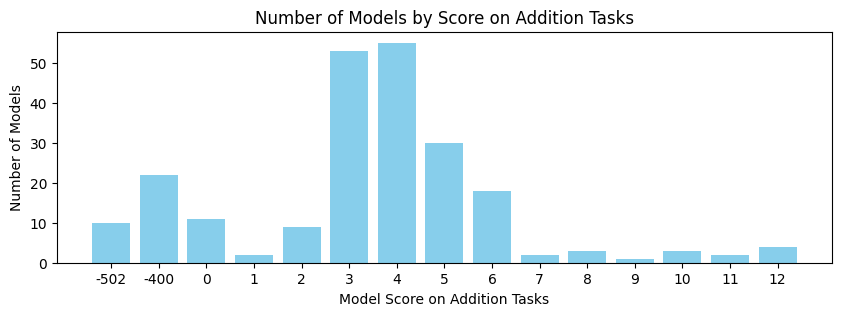

In [14]:
# Graph the results with categorical x-axis for scores
scores_sorted = sorted(score_counts.keys(), key=lambda x: (isinstance(x, int), x))
counts_sorted = [score_counts[s] for s in scores_sorted]
plt.figure(figsize=(10,3))
plt.bar(range(len(scores_sorted)), counts_sorted, color='skyblue')
plt.xlabel('Model Score on Addition Tasks')
plt.ylabel('Number of Models')
plt.title('Number of Models by Score on Addition Tasks')
plt.xticks(range(len(scores_sorted)), [str(s) for s in scores_sorted])
plt.show()

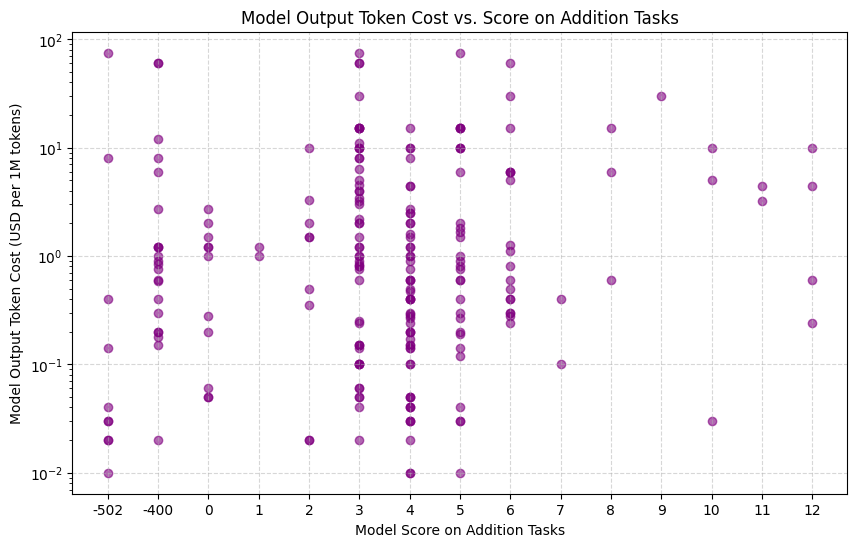

In [15]:
# Scatter plot: Output Token Cost vs. Model Score (Score as categorical x-axis)
import numpy as np
model_name_to_output_cost = {model[0]: model[2] for model in martian_models_data}
model_names = [entry['model'] for entry in model_scores]
scores = [entry['score'] for entry in model_scores]
output_costs = [model_name_to_output_cost.get(name, np.nan) for name in model_names]
# Prepare categorical x-axis for scores
unique_scores = sorted(set(scores), key=lambda x: (isinstance(x, int), x))
score_to_x = {score: i for i, score in enumerate(unique_scores)}
x_vals = [score_to_x[score] for score in scores]
plt.figure(figsize=(10,6))
plt.scatter(x_vals, output_costs, alpha=0.6, color='purple')
plt.xlabel('Model Score on Addition Tasks')
plt.ylabel('Model Output Token Cost (USD per 1M tokens)')
plt.title('Model Output Token Cost vs. Score on Addition Tasks')
plt.xticks(range(len(unique_scores)), [str(s) for s in unique_scores])
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [22]:
# List only models with a negative score or score 12
score_to_models = {}
for entry in model_scores:
    score = entry['score']
    if score <= 0 or score >= 10:
        score_to_models.setdefault(score, []).append(entry['model'])

for score in sorted(score_to_models):
    print(f"\nModels with score {score}:")
    for model in score_to_models[score]:
        print(f"  {model}")


Models with score -502:
  agentica-org/deepcoder-14b-preview
  arliai/qwq-32b-arliai-rpr-v1
  cognitivecomputations/dolphin3.0-r1-mistral-24b
  anthropic/claude-opus-4-1-20250805
  moonshotai/kimi-vl-a3b-thinking
  nousresearch/deephermes-3-mistral-24b-preview
  perplexity/r1-1776
  opengvlab/internvl3-14b
  shisa-ai/shisa-v2-llama3.3-70b
  thudm/glm-z1-32b

Models with score -400:
  ai21/jamba-1.6-large
  ai21/jamba-1.6-mini
  martian/code
  arcee-ai/caller-large
  arcee-ai/arcee-blitz
  deepseek/deepseek-r1-distill-qwen-1.5b
  deepseek/deepseek-r1-distill-qwen-7b
  eva-unit-01/eva-qwen-2.5-72b
  liquid/lfm-40b
  mistralai/mistral-7b-instruct-v0.2
  morph/morph-v2
  nothingiisreal/mn-celeste-12b
  nousresearch/nous-hermes-2-mixtral-8x7b-dpo
  openai/o1-preview
  openai/o1-preview-2024-09-12
  qwen/qwen-2-72b-instruct
  qwen/qwen3-235b-a22b-07-25
  sao10k/fimbulvetr-11b-v2
  sarvamai/sarvam-m
  thedrummer/valkyrie-49b-v1
  tngtech/deepseek-r1t2-chimera
  undi95/toppy-m-7b

Models with

# Check zero-score model output

On occasion, check the output of the "0 score" models to see if unusual answer formats are hiding correct answers.
If so, is_ground_truth_correct should be updated

In [17]:
# Re-run models that scored 0 on test[0] and show their outputs
def run_zero_score_models():
    zero_score_models = [m['model'] for m in model_scores if m['score'] == 0]
    print(f"Re-running {len(zero_score_models)} models that scored 0 on the first test...")
    outputs = []
    for model_name in zero_score_models:
        try:
            answer, success = run_model_inference(model_name, tests[0][0], tests[0][1])
        except Exception as e:
            answer = f"Error: {str(e)}"
            success = False
        outputs.append({'model': model_name, 'output': answer, 'success': success})
        print(f"Model: {model_name}\nOutput: {answer}\nSuccess: {success}\n{'-'*40}")


#run_zero_score_models()

# Check -400 score models

Models can generate -400 scores if a mandatory parameter is missing. This may hide a model that can do addition.
Run the models that give a -400 score and see if the detailed error message shows the root cause.

In [18]:
# Re-run models that scored -400 and show their outputs and errors
def run_minus_400_score_models():
    minus_400_models = [m['model'] for m in model_scores if m['score'] == -400]
    print(f"Re-running {len(minus_400_models)} models that scored -400 on the first test...")
    outputs = []
    for model_name in minus_400_models:
        try:
            answer, success = run_model_inference(model_name, tests[0][0], tests[0][1])
        except Exception as e:
            answer = f"Error: {str(e)}"
            success = False
        outputs.append({'model': model_name, 'output': answer, 'success': success})
        print(f"Model: {model_name}\nOutput/Error: {answer}\nSuccess: {success}\n{'-'*40}")

#run_minus_400_score_models()

# High Variability Example
The model "alfredpros/codellama-7b-instruct-solidity" has high variability. Sometimes answer is correct

In [19]:
model_name = "alfredpros/codellama-7b-instruct-solidity"
for i in range(5):
    answer, success = run_model_inference(model_name, tests[0][0], tests[0][1])
    print(f"Success: {success}. Output: {answer}")

Success: False. Output: 11+5=
Success: False. Output: I prefer ping pong!!

# Stop wanting to fly

I've been looking over the top of the polyester irises for a good half hour now and I can see that all I've got left is platonic friendship and plain old boring old friends. Why do I bother with all of this nonsense? I've earned my wings but they've never flown here. I mean, what disgrace is this to my station? I swear blondes do not get more disgraceful than us blonde types who wear virtually identical uniforms. The shock of greeting non-blondes that come into our world never wears off. I am constantly bombarded! We've all got news! Oh, I read "Corner with Me" yesterday and a blonde friend of mine was reading "Is there another you" by Daniel Wallace. Strange! We're so not meant for the spotlight! You know what we get? "Celebrity" status! "Boss" status! Uh, err: "boss". That's us! The brownie points are worth it? What justice is this? Teenagers are either neurotic worriers or they're uppe

# Misc testing

In [20]:
#model_name = "meta-llama/llama-guard-2-8b"
model_name = "perplexity/sonar-pro"

answer, success = run_model_inference(model_name, tests[0][0], tests[0][1])
print(f"Model: {model_name}\nOutput: {answer}\nSuccess: {success}\n{'-'*40}")

Model: perplexity/sonar-pro
Output: 6 + 5 = **11**.
Success: True
----------------------------------------


In [21]:
import random
from typing import List, Tuple

def generate_cascading_carry_pair(digits: int) -> Tuple[int, int, int]:
    """
    Generate two numbers where:
    - Units column sums to ≥10 (creates initial carry)
    - All other columns sum to exactly 9 (so +1 carry = 10, propagating carry)
    
    This creates a cascading carry through ALL columns.
    """
    num1_digits = []
    num2_digits = []
    
    for i in range(digits):
        if i == 0:  # Units column - must sum to ≥10
            # Choose pairs that sum to 10-18 for variety
            pairs = [(1,9), (2,8), (3,7), (4,6), (5,5), (6,4), (7,3), (8,2), (9,1),
                    (2,9), (3,8), (4,7), (5,6), (6,5), (7,4), (8,3), (9,2),
                    (3,9), (4,8), (5,7), (6,6), (7,5), (8,4), (9,3),
                    (4,9), (5,8), (6,7), (7,6), (8,5), (9,4),
                    (5,9), (6,8), (7,7), (8,6), (9,5),
                    (6,9), (7,8), (8,7), (9,6),
                    (7,9), (8,8), (9,7),
                    (8,9), (9,8), (9,9)]
            d1, d2 = random.choice(pairs)
        else:  # All other columns - must sum to exactly 9
            pairs = [(0,9), (1,8), (2,7), (3,6), (4,5), (5,4), (6,3), (7,2), (8,1), (9,0)]
            d1, d2 = random.choice(pairs)
        
        num1_digits.append(d1)
        num2_digits.append(d2)
    
    # Convert digit arrays to numbers (reverse because we built right-to-left)
    num1 = int(''.join(map(str, reversed(num1_digits))))
    num2 = int(''.join(map(str, reversed(num2_digits))))
    result = num1 + num2
    
    return num1, num2, result

def verify_cascading_carry(num1: int, num2: int) -> bool:
    """
    Verify that:
    1. Units digits sum to ≥10
    2. All other digit pairs sum to exactly 9
    3. This creates a carry that propagates through all columns
    """
    str1 = str(num1).zfill(max(len(str(num1)), len(str(num2))))
    str2 = str(num2).zfill(max(len(str(num1)), len(str(num2))))
    
    # Check units column sums to ≥10
    units_sum = int(str1[-1]) + int(str2[-1])
    if units_sum < 10:
        return False
    
    # Check all other columns sum to exactly 9
    for i in range(len(str1) - 2, -1, -1):  # All except units
        digit_sum = int(str1[i]) + int(str2[i])
        if digit_sum != 9:
            return False
    
    return True

def create_non_obvious_cascading_tests() -> List[List[str]]:
    """Create hand-crafted tests that look natural but have cascading carries"""
    
    # Strategy: Create numbers that don't follow obvious patterns
    # but still satisfy: units≥10, all others=9
    
    tests = []
    
    # 1-digit: just needs ≥10
    cases_1d = [(3,7), (4,6), (5,5), (6,4), (7,3), (8,2), (9,1)]
    num1, num2 = random.choice(cases_1d)
    tests.append([f"Answer concisely: {num1}+{num2}=", str(num1+num2)])
    
    # 2-digit: tens must sum to 9, units ≥10
    cases_2d = [
        (17, 82),  # 1+8=9, 7+2=9... wait, that's wrong
        (19, 82),  # 1+8=9, 9+2=11 ✓
        (28, 73),  # 2+7=9, 8+3=11 ✓  
        (37, 64),  # 3+6=9, 7+4=11 ✓
        (46, 55),  # 4+5=9, 6+5=11 ✓
        (64, 37),  # 6+3=9, 4+7=11 ✓
        (73, 28),  # 7+2=9, 3+8=11 ✓
        (82, 19),  # 8+1=9, 2+9=11 ✓
        (91, 19),  # 9+1=10, 1+9=10 ✓ (but this breaks pattern)
    ]
    
    # Let me recalculate 2-digit cases properly
    valid_2d = []
    for tens1 in range(10):
        for units1 in range(10):
            for tens2 in range(10):
                for units2 in range(10):
                    if tens1 + tens2 == 9 and units1 + units2 >= 10:
                        if tens1 > 0 or tens2 > 0:  # Avoid leading zeros
                            num1 = tens1 * 10 + units1
                            num2 = tens2 * 10 + units2
                            valid_2d.append((num1, num2))
    
    # Pick some nice looking ones
    selected_2d = [(19, 82), (28, 73), (37, 64), (46, 55), (64, 37), (73, 28), (82, 19)]
    for num1, num2 in selected_2d[:3]:  # Just take a few
        tests.append([f"Answer concisely: {num1}+{num2}=", str(num1+num2)])
    
    # For longer numbers, I'll construct them systematically
    # 3-digit example: ABC + DEF where A+D=9, B+E=9, C+F≥10
    examples = [
        (139, 872),  # 1+8=9, 3+7=10 (wrong, need to fix)
        (194, 817),  # 1+8=9, 9+1=10, 4+7=11 ✓
        (285, 726),  # 2+7=9, 8+2=10, 5+6=11 ✓
        (376, 635),  # 3+6=9, 7+3=10, 6+5=11 ✓
        (467, 544),  # 4+5=9, 6+4=10, 7+4=11 ✓
    ]
    
    # Let me generate these properly
    def make_cascading_number(digits, seed=None):
        if seed:
            random.seed(seed)
        
        # Generate first number digits
        num1_digits = []
        num2_digits = []
        
        # Units: sum ≥10
        units_pairs = [(1,9), (2,8), (3,7), (4,6), (5,5), (6,4), (7,3), (8,2), (9,1),
                      (2,9), (3,8), (4,7), (5,6), (6,5), (7,4), (8,3), (9,2)]
        u1, u2 = random.choice(units_pairs)
        num1_digits.append(u1)
        num2_digits.append(u2)
        
        # Other digits: sum = 9
        for i in range(1, digits):
            nine_pairs = [(0,9), (1,8), (2,7), (3,6), (4,5), (5,4), (6,3), (7,2), (8,1), (9,0)]
            d1, d2 = random.choice(nine_pairs)
            # Avoid leading zeros
            if i == digits - 1:  # Most significant digit
                while d1 == 0 and d2 == 0:
                    d1, d2 = random.choice(nine_pairs)
            num1_digits.append(d1)
            num2_digits.append(d2)
        
        # Convert to numbers (reverse because we built right-to-left)
        num1 = int(''.join(map(str, reversed(num1_digits))))
        num2 = int(''.join(map(str, reversed(num2_digits))))
        return num1, num2
    
    # Generate test cases for each length
    for digits in range(3, 13):
        num1, num2 = make_cascading_number(digits, seed=digits*42)
        
        # Verify it works
        if verify_cascading_carry(num1, num2):
            result = num1 + num2
            tests.append([f"Answer concisely: {num1}+{num2}=", str(result)])
        else:
            print(f"Failed to generate valid {digits}-digit case")
    
    return tests

def analyze_pattern():
    """Analyze why the original pattern works"""
    print("=== ANALYZING ORIGINAL PATTERN ===")
    original_pairs = [
        (4, 9),
        (44, 59),
        (444, 559),
        (4444, 5559),
        (44444, 55559),
        (444444, 555559),
        (4444444, 5555559),
        (44444444, 55555559),
        (444444444, 555555559),
        (4444444444, 5555555559),
        (44444444444, 55555555559),
        (444444444444, 555555555559)
    ]
    
    for num1, num2 in original_pairs:
        str1, str2 = str(num1), str(num2)
        print(f"\n{num1} + {num2} = {num1+num2}")
        
        # Check each column
        max_len = max(len(str1), len(str2))
        str1 = str1.zfill(max_len)
        str2 = str2.zfill(max_len)
        
        print("Column analysis (right to left):")
        for i in range(max_len - 1, -1, -1):
            d1, d2 = int(str1[i]), int(str2[i])
            sum_val = d1 + d2
            col_name = "units" if i == max_len - 1 else f"pos-{max_len-1-i}"
            print(f"  {col_name}: {d1}+{d2}={sum_val}")
        
        print(f"  Cascading carry: {verify_cascading_carry(num1, num2)}")

# Run analysis
analyze_pattern()

print("\n" + "="*60)
print("GENERATING NON-OBVIOUS CASCADING CARRY TESTS")
print("="*60)

# Set seed for reproducible results
random.seed(12345)

# Generate the new tests
new_tests = create_non_obvious_cascading_tests()

print("\n=== NEW NON-OBVIOUS TESTS ===")
for i, test in enumerate(new_tests, 1):
    question, answer = test
    # Extract numbers to verify
    math_part = question.split(": ")[1].rstrip("=")
    num1_str, num2_str = math_part.split("+")
    num1, num2 = int(num1_str), int(num2_str)
    
    # Verify cascading carry
    is_valid = verify_cascading_carry(num1, num2)
    status = "✓" if is_valid else "✗"
    
    print(f"{i:2d}. {question:50} {answer:15} {status}")

print(f"\n=== PYTHON CODE FOR REPLACEMENT ===")
print("# Non-obvious cascading carry tests")
print("# Units column ≥10, all other columns sum to exactly 9")
print("tests = [")
for test in new_tests:
    print(f"    {test},")
print("]")

print(f"\n=== VERIFICATION SUMMARY ===")
valid_count = sum(1 for test in new_tests if verify_cascading_carry(
    int(test[0].split(": ")[1].split("+")[0]), 
    int(test[0].split(": ")[1].split("+")[1].rstrip("="))
))
print(f"Total tests: {len(new_tests)}")
print(f"Valid cascading carry tests: {valid_count}")
print(f"Success rate: {100*valid_count/len(new_tests):.1f}%")

=== ANALYZING ORIGINAL PATTERN ===

4 + 9 = 13
Column analysis (right to left):
  units: 4+9=13
  Cascading carry: True

44 + 59 = 103
Column analysis (right to left):
  units: 4+9=13
  pos-1: 4+5=9
  Cascading carry: True

444 + 559 = 1003
Column analysis (right to left):
  units: 4+9=13
  pos-1: 4+5=9
  pos-2: 4+5=9
  Cascading carry: True

4444 + 5559 = 10003
Column analysis (right to left):
  units: 4+9=13
  pos-1: 4+5=9
  pos-2: 4+5=9
  pos-3: 4+5=9
  Cascading carry: True

44444 + 55559 = 100003
Column analysis (right to left):
  units: 4+9=13
  pos-1: 4+5=9
  pos-2: 4+5=9
  pos-3: 4+5=9
  pos-4: 4+5=9
  Cascading carry: True

444444 + 555559 = 1000003
Column analysis (right to left):
  units: 4+9=13
  pos-1: 4+5=9
  pos-2: 4+5=9
  pos-3: 4+5=9
  pos-4: 4+5=9
  pos-5: 4+5=9
  Cascading carry: True

4444444 + 5555559 = 10000003
Column analysis (right to left):
  units: 4+9=13
  pos-1: 4+5=9
  pos-2: 4+5=9
  pos-3: 4+5=9
  pos-4: 4+5=9
  pos-5: 4+5=9
  pos-6: 4+5=9
  Cascading carr